In [2]:
import pandas as pd

import numpy as np

In [3]:
df= pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [4]:
# Getting first 5 rows of dataframe

df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [5]:
# getting information of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [6]:
# getting summary statistics

df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [7]:
# getting the column names

df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [8]:
# getting shape of dataframe

df.shape

(167, 5)

In [9]:
# get categories and count of categorical variables

df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [10]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

In [11]:
# get encoding of categorical features

df.replace({'Motor': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}}, inplace= True)

In [12]:
df.replace({'Screw': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}}, inplace= True)

In [13]:
# define y and X

y= df['Class']

y.shape

(167,)

In [14]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [15]:
X= df[['Motor', 'Screw', 'Pgain', 'Vgain']]

X.shape

(167, 4)

In [16]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [17]:
# get train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.8, random_state= 2529)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33, 4), (134, 4), (33,), (134,))

In [19]:
# get model trained

from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# get model prediction

y_pred= lr.predict(X_test)

In [21]:
y_pred.shape

(134,)

In [22]:
y_pred

array([ 23.65572978,  29.64324609,  18.47095676,  23.05897563,
        38.33148444,  23.32337561,  10.75158885,  18.39222079,
        40.21002621,  40.76780651,  12.63013062,  24.79082723,
        16.59241499,  13.46106596,  21.0337437 ,  19.85967241,
        -6.13506174,  29.29135508,  31.16989685,  -0.55863558,
        32.84254931,  30.61211654,  33.25363945,  28.32248463,
        17.42335034,   6.66215115,  28.4012206 ,  15.19291756,
        23.47006577,   3.46284792,  30.27976236,  22.56039446,
        34.36920007,  30.20102639,   9.70398243,   2.69986677,
        21.18043387,  31.52178785,  14.78182742,  37.01072298,
        26.85503301,  20.27076255,   8.38322097,   6.50467921,
        30.05433623,  27.41281331,  32.4906583 ,   4.02062823,
        22.14930432,  18.95000109,  24.43893623,   9.14620213,
        24.10658205,  35.27887138,  17.98113064,  -0.49943645,
        37.56850329,   0.2635447 ,  19.3018921 ,  -2.93575852,
        22.00261415,  32.07956816,  23.80241995,  25.12

In [23]:
# get model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
mean_squared_error(y_test, y_pred)

67.28046565842631

In [25]:
mean_absolute_error(y_test, y_pred)

7.015312847774422

In [26]:
r2_score(y_test, y_pred)

0.6580658063942404

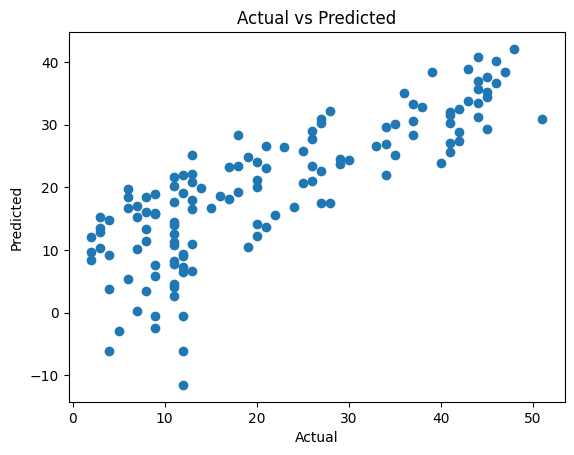

In [27]:
# get visualization of actual vs predicted results

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [44]:
# get future predictions

X_new= df.sample()

In [47]:
X_new

,Motor,Screw,Pgain,Vgain,Class
164,2,3,4,3,25


In [46]:
X_new.shape

(1, 5)

In [48]:
X_new.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [49]:
X_new = X_new.drop('Class', axis= 1)

X_new

,Motor,Screw,Pgain,Vgain
164,2,3,4,3


In [50]:
X_new.shape

(1, 4)

In [52]:
y_pred_new= lr.predict(X_new)

In [53]:
y_pred_new

array([20.68185269])